# Part3. Predictive-Modeling
ref : https://www.kaggle.com/ash316/eda-to-prediction-dietanic

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/tatanic-train-preprocessed/train_preprocessed.csv


In [2]:
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

## Load & Split preprocessed dataset

In [3]:
data = pd.read_csv('/kaggle/input/tatanic-train-preprocessed/train_preprocessed.csv')
data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_band,Family_size,Alone,Fare_range,Sex_male,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Port_C,Port_Q
0,0,3,22.0,1,0,7.2500,1,1,0,0,1,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,2,1,0,3,0,0,0,0,1,1,0


In [4]:
X_train, X_val, y_train, y_val = train_test_split(data.iloc[:, 1:], data['Survived'],
                                                    stratify=data['Survived'],
                                                    test_size=0.3, random_state=0)

# Check the balance of labels
display(y_train.value_counts(normalize=True))
display(y_val.value_counts(normalize=True))
display(X_train.head(2))

0    0.616372
1    0.383628
Name: Survived, dtype: float64

0    0.615672
1    0.384328
Name: Survived, dtype: float64

,Pclass,Age,SibSp,Parch,Fare,Age_band,Family_size,Alone,Fare_range,Sex_male,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Port_C,Port_Q
231,3,29.0,0,0,7.7750,1,0,1,0,1,0,0,1,0,0,0
836,3,21.0,0,0,8.6625,1,0,1,1,1,0,0,1,0,0,0


## model 1. Radial Support Vector Machines(rbf-SVM)

In [5]:
svm_clf = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)
svm_clf.fit(X_train, y_train)

prediction = svm_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of rbf-SVM:', score)

accuracy of rbf-SVM: 0.7388059701492538


## model 2. Linear Support Vector Machine(linear-SVM)

In [6]:
svm_clf = svm.SVC(C=0.1, kernel='linear', gamma=0.1)
svm_clf.fit(X_train, y_train)

prediction = svm_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of linear-SVM:', score)

accuracy of linear-SVM: 0.8208955223880597


## model 3. Logistic Regression

In [7]:
logistic_clf = LogisticRegression(max_iter=1000)
logistic_clf.fit(X_train, y_train)

prediction = logistic_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of logistic regression:', score)

accuracy of logistic regression: 0.8432835820895522


## model 4. Decision Tree

In [8]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

prediction = dt_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of Decision Tree:', score)

accuracy of Decision Tree: 0.753731343283582


## model 5. K-Nearest Neighbors(KNN)

In [9]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

prediction = knn_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of KNN:', score)

accuracy of KNN: 0.7350746268656716


The accuracy of KNN model changes as the **n_neighbors** parameter changes. The default value of n_neighbors is 5. We can compare the accuracy of KNN models with different n_neighbors parameters.

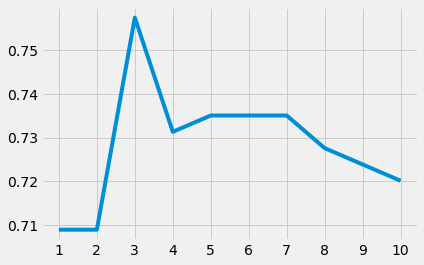

>>> Accuracy list: [0.7089552238805971, 0.7089552238805971, 0.7574626865671642, 0.7313432835820896, 0.7350746268656716, 0.7350746268656716, 0.7350746268656716, 0.7276119402985075, 0.7238805970149254, 0.7201492537313433]
>>> Maximum accuracy: 0.7574626865671642


In [10]:
acc_list = []
for tmp_param in range(1, 11):
    tmp_knn_clf = KNeighborsClassifier(n_neighbors = tmp_param)
    tmp_knn_clf.fit(X_train, y_train)
    tmp_acc = metrics.accuracy_score(y_val, tmp_knn_clf.predict(X_val))
    
    acc_list.append(tmp_acc)

plt.plot(range(1,11), acc_list)
plt.xticks(range(1,11))
plt.show()

print(f'>>> Accuracy list: {acc_list}')
print(f'>>> Maximum accuracy: {max(acc_list)}')

## model 6. Gaussian Naive Bayes

In [11]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

prediction = nb_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of Naive Bayes:', score)

accuracy of Naive Bayes: 0.8171641791044776


## model 7. Random Forest

In [12]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

prediction = rf_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of Random Forest:', score)

accuracy of Random Forest: 0.8059701492537313


The validation accuracy of models is not the only metric to decide best model. The robustness is also important. The accuracy of a model changes as new data is input. This is known as **model variance**.<br><br>
To overcome this and get a generalized(robust) model, we use **Cross Validation**, more specifically **K-fold Cross Validation**.

## Cross Validation

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [14]:
kfold = StratifiedKFold(n_splits=10, random_state=22, shuffle=True)
model_names = ['rbf-SVM', 'linear-SVM', 'logistic regression', 'Decision Tree', 'KNN', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(C=1.0, kernel='rbf', gamma=0.1), svm.SVC(C=0.1, kernel='linear', gamma=0.1), LogisticRegression(max_iter=1000), 
          DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3), GaussianNB(), RandomForestClassifier(n_estimators=100)]

acc_list = []
acc_mean_list = []
acc_std_list = []

for tmp_model in models:
    cv_result = cross_val_score(tmp_model, data.iloc[:, 1:], data['Survived'],
                                cv=kfold, scoring='accuracy')
    acc_list.append(cv_result)
    acc_mean_list.append(cv_result.mean())
    acc_std_list.append(cv_result.std())

pd.DataFrame({'CV_mean':acc_mean_list, 'CV_std':acc_std_list}, index=model_names).sort_values('CV_mean')

,CV_mean,CV_std
KNN,0.738402,0.045325
rbf-SVM,0.746292,0.037312
Decision Tree,0.790137,0.037865
Random Forest,0.807004,0.027949
Naive Bayes,0.809238,0.039360
linear-SVM,0.824969,0.032660
logistic regression,0.826055,0.034442


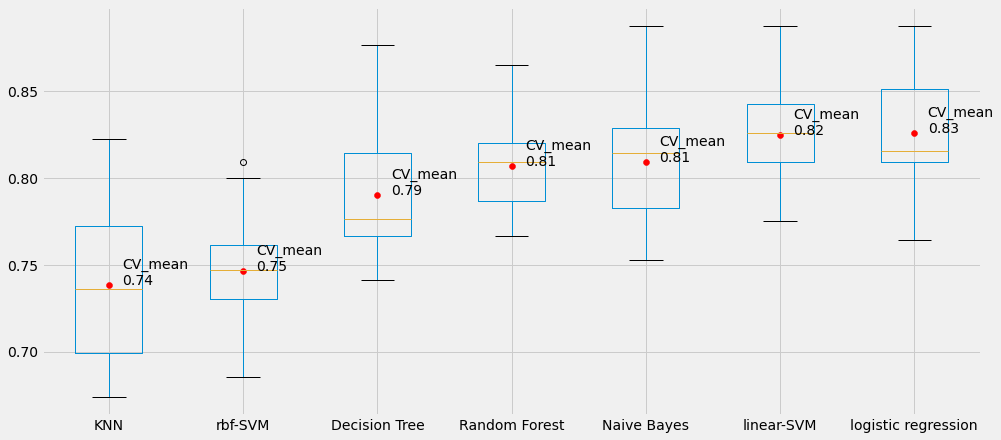

In [15]:
plt.figure(figsize=(15, 7))

# Draw boxplot of each model
tmp_df = pd.concat([pd.DataFrame(acc_list, index=model_names), 
                    pd.DataFrame({'CV_mean':acc_mean_list}, index=model_names)],
                   axis=1)
tmp_df.sort_values('CV_mean').drop(columns='CV_mean').T.boxplot()

# Annotate CV_mean on each boxplot
acc_mean_sorted = sorted(acc_mean_list)
plt.scatter(range(1,8), acc_mean_sorted, color='red')
for tmp_x, tmp_y in zip(np.arange(1,8), acc_mean_sorted):
    plt.text(tmp_x+0.1, tmp_y, s=f'CV_mean\n{tmp_y:.2f}')

plt.show()

- Top-4 models in regard to accuracy are **Random Forest, Naive Bayes, linear-SVM, logistic regression**. Random Forest seems most robust among them.
- However, only using classification accuracy is sometimes misleading due to data imbalance. We can get a better version of summarized result with the help of **confusion matrix**, which shows how many mistakes the model made in each case.

## Confusion Matrix

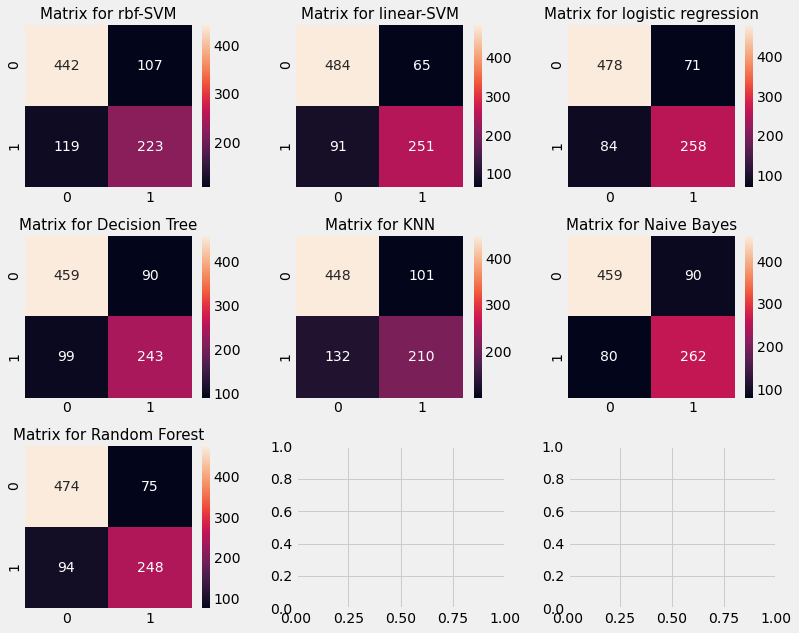

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(12, 10))

for tmp_ax, tmp_model, tmp_name in zip(ax.ravel(), models, model_names):
    y_pred = cross_val_predict(tmp_model, data.iloc[:, 1:], data['Survived'], cv=kfold)
    sns.heatmap(metrics.confusion_matrix(data['Survived'], y_pred),
                ax=tmp_ax, annot=True, fmt='2.0f')
    tmp_ax.set_title(f'Matrix for {tmp_name}', size=15)

plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.show()

- The left diagonal of confusion matrix shows the number of correct predictions while the right one shows wrong predictions.
- Looking all the matrices, **linear-SVM** is good at predicting deceased passengers and **Naive Bayes** is good at predicting survived passengers.

## Hyper-parameter Tuning 1. Naive Bayes
I will tune the hyper-parameters for the 4 best models i.e. Naive Bayes, Random Forest, SVM and Logistic Regression

In [17]:
from sklearn.model_selection import GridSearchCV

param={'var_smoothing':[1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]}
gd = GridSearchCV(estimator=GaussianNB(), param_grid=param,
                  verbose=True, n_jobs=-1)
gd.fit(data.iloc[:, 1:], data['Survived'])

print('>>> best score :', gd.best_score_)
print('>>> best param set :', gd.best_estimator_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


>>> best score : 0.8137028435126483
>>> best param set : GaussianNB(priors=None, var_smoothing=1e-05)


[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    1.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.5s finished


## Hyper-parameter Tuning 2. Random Forest

In [18]:
n_estimators = range(100, 1000, 100)
min_samples_split = [1, 2, 3, 5, 7, 10]
max_features = ['sqrt', 'log2']
bootstrap = [True, False]

param = {'n_estimators':n_estimators, 'min_samples_split':min_samples_split,
         'max_features':max_features, 'bootstrap':bootstrap}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                  param_grid=param, verbose=True, n_jobs=-1)
gd.fit(data.iloc[:, 1:], data['Survived'])

print('>>> best score :', gd.best_score_)
print('>>> best param set :', gd.best_estimator_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.4min finished


>>> best score : 0.8406440273680247
>>> best param set : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


## Hyper-parameter Tuning 3. SVM

In [19]:
C = [(i+1)/10 for i in range(10)] + [0.05, 0.25]
gamma = [(i+1)/10 for i in range(10)]
kernel = ['rbf', 'linear']

param = {'C':C, 'gamma':gamma, 'kernel':kernel}
gd = GridSearchCV(estimator=svm.SVC(random_state=0), param_grid=param,
                  verbose=True, n_jobs=-1)
gd.fit(data.iloc[:, 1:], data['Survived'])

print('>>> best score :', gd.best_score_)
print('>>> best param set :', gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  5.4min finished


>>> best score : 0.8293829640323898
>>> best param set : SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


## Hyper-parameter Tuning 4. Logistic Regression

In [20]:
penalty = ['l1', 'l2', 'elasticnet']
C = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1000, 1500, 2000]

param={'penalty':penalty, 'C':C, 'solver':solver, 'max_iter':max_iter}
gd = GridSearchCV(estimator=LogisticRegression(random_state=0),
                  param_grid=param, verbose=True, n_jobs=-1)
gd.fit(data.iloc[:, 1:], data['Survived'])

print('>>> best score :', gd.best_score_)
print('>>> best param set :', gd.best_estimator_)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   43.6s finished


>>> best score : 0.8237838177138912
>>> best param set : LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


- The best score of Naive Bayes is **81.37%** with **var_smoothing=1e-05**
- The best score of Random Forest is **84.06%** with **n_estimators=900, min_samples_split=10, max_features='sqrt' and bootstrap=True**
- The best score of SVM is **82.94%** with **C=0.5, gamma=0.1 and kernel='linear'**
- The best score of Logistic Regression is **82.38%** with **penalty='l2', C=0.75, solver='lbfgs' and max_iter=1000**

## Ensembling
- Ensembling is a good way to increase the accuracy, stability or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.
- Ensembling can be done in ways like: **Voting Classifier, Bagging, Boosting**.

## Ensembling 1. Voting Classifier
- It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of different types.

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import VotingClassifier

ensemble_clf = VotingClassifier(estimators=[('SVM', svm.SVC(C=0.5, gamma=0.1, kernel='linear', probability=True)), 
                                            ('LR', LogisticRegression(random_state=0, penalty='l2', C=0.75, solver='lbfgs', max_iter=1000)), 
                                            ('DT', DecisionTreeClassifier()), 
                                            ('KNN', KNeighborsClassifier(n_neighbors=3)), 
                                            ('NB', GaussianNB(var_smoothing=1e-05)), 
                                            ('RanFor', RandomForestClassifier(n_estimators=900, min_samples_split=10, max_features='sqrt', bootstrap=True))],
                                voting='soft', n_jobs=-1)

kfold = StratifiedKFold(n_splits=10, random_state=22, shuffle=True)
cv_score = cross_val_score(ensemble_clf, X=data.iloc[:, 1:], y=data['Survived'],
                           cv=kfold, scoring='accuracy', n_jobs=-1)
print('>>> The cross validation accuracy:', cv_score.mean())

ensemble_clf.fit(X_train, y_train)
print('>>> The validation accuracy:', ensemble_clf.score(X_val, y_val))

>>> The cross validation accuracy: 0.8305493133583021
>>> The validation accuracy: 0.8171641791044776


## Ensembling 2. Bagging
- Bagging works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging, there is reduction in variance. Unlike Voting Classifier, Bagging makes use of same classifiers.
- Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forest.

#### 1) Bagged KNN

In [22]:
from sklearn.ensemble import BaggingClassifier

ensemble_clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                          n_estimators=700, max_samples=1.0, max_features=1.0,
                          random_state=0, n_jobs=-1)


kfold = StratifiedKFold(n_splits=10, random_state=22, shuffle=True)
cv_score = cross_val_score(ensemble_clf, X=data.iloc[:, 1:], y=data['Survived'],
                           cv=kfold, scoring='accuracy')
print('>>> The cross validation accuracy of Bagged KNN:', cv_score.mean())


ensemble_clf.fit(X_train, y_train)
prediction = ensemble_clf.predict(X_val)
print('>>> The validation accuracy of Bagged KNN:', metrics.accuracy_score(y_val, prediction))

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>>> The cross validation accuracy of Bagged KNN: 0.742896379525593
>>> The validation accuracy of Bagged KNN: 0.753731343283582


#### 2) Bagged Decision Tree

In [23]:
ensemble_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                 n_estimators=100, max_samples=1.0, max_features=1.0,
                                 random_state=0, n_jobs=-1)


kfold = StratifiedKFold(n_splits=10, random_state=22, shuffle=True)
cv_score = cross_val_score(ensemble_clf, X=data.iloc[:, 1:], y=data['Survived'],
                           cv=kfold, scoring='accuracy')
print('>>> The cross validation accuracy of Bagged Decision Tree:', cv_score.mean())


ensemble_clf.fit(X_train, y_train)
prediction = ensemble_clf.predict(X_val)
print('>>> The validation accuracy of Bagged Decision Tree:', metrics.accuracy_score(y_val, prediction))

>>> The cross validation accuracy of Bagged Decision Tree: 0.8204619225967541
>>> The validation accuracy of Bagged Decision Tree: 0.835820895522388


## Ensembling 3. Boosting
- Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step-by-step enhancement of a weak model.
- Boosting works as follows: A model is first trained on the complete dataset. Then the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to them. Thus, it will try to predict the wrong instance corretly. Now this iterative process continues, and the model will keep developing until the limit reached on the accuracy.

#### 1) AdaBoost (Adaptive Boosting)
- The weak learner or estimator in this case is a Decision Tree. But we can change the default base_estimator to any algorithm of our choice.

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.1,
                         random_state=0)

kfold = StratifiedKFold(n_splits=10, random_state=22, shuffle=True)
cv_score = cross_val_score(ada, data.iloc[:, 1:], data['Survived'],
                           scoring='accuracy', cv=kfold, n_jobs=-1)
print('>>> The cross validation accuracy of AdaBoost(DT):', cv_score.mean())

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>>> The cross validation accuracy of AdaBoost(DT): 0.8159675405742821


#### 2) Stochastic Gradient Boosting
- Here, the weak learner is also a Decision Tree.

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1,
                                  random_state=0)

kfold = StratifiedKFold(n_splits=10, random_state=22, shuffle=True)
cv_score = cross_val_score(grad, data.iloc[:, 1:], data['Survived'],
                           scoring='accuracy', cv=kfold, n_jobs=-1)
print('>>> The cross validation accuracy of Stochastic Gradient Boosting(DT):', cv_score.mean())

>>> The cross validation accuracy of Stochastic Gradient Boosting(DT): 0.833932584269663


#### 3) XGBoost

In [26]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(learning_rate=0.1, n_jobs=-1,
                            random_state=0, n_estimators=900)

kfold = StratifiedKFold(n_splits=10, random_state=22, shuffle=True)
cv_score = cross_val_score(xgb_clf, data.iloc[:, 1:], data['Survived'],
                           scoring='accuracy', cv=kfold, n_jobs=-1)
print('>>> The cross validation accuracy of XGBoost:', cv_score.mean())

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>>> The cross validation accuracy of XGBoost: 0.8114856429463172
